In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.metrics import roc_auc_score, mean_squared_error

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
pwd

'd:\\all F proj\\APP'

In [3]:
D2D_severity = pd.read_csv('D:\FINAL YEAR PROJECT\drugs\D2D_severity_processed.csv')
excipients = pd.read_csv('D:\FINAL YEAR PROJECT\drugs\excipients_processed_1.csv')

In [4]:
D2D_severity.shape

(801, 7)

In [5]:
D2D_severity.head(20)

,DRUG1,DRUG2,SEVERITY-MAJOR,SEVERITY-MINOR,SEVERITY-MODERATE,SEVERITY-NONE,DESCRIPTION
0,ACETAMINOPHEN (TYLENOL),PARACETAMOL,0,0,0,1,No Interactions Found
1,ACETAMINOPHEN (TYLENOL),ASPIRIN,0,0,0,1,No Interactions Found
2,ACETAMINOPHEN (TYLENOL),IBUPROFEN,0,0,0,1,No Interactions Found
3,ACETAMINOPHEN (TYLENOL),METFORMIN,0,0,0,1,No Interactions Found
4,ACETAMINOPHEN (TYLENOL),CIPROFLOXACIN,1,0,0,0,The metabolism of Acetaminophen can be decreas...
5,ACETAMINOPHEN (TYLENOL),AMOXICILLIN,0,1,0,0,Acetaminophen may decrease the excretion rate ...
6,ACETAMINOPHEN (TYLENOL),OMEPRAZOLE,0,0,0,1,No Interactions Found
7,ACETAMINOPHEN (TYLENOL),ATORVASTATIN,0,0,1,0,The metabolism of Atorvastatin can be decrease...
8,ACETAMINOPHEN (TYLENOL),LOSARTAN,0,0,0,1,No Interactions Found
9,ACETAMINOPHEN (TYLENOL),AMLODIPINE,0,0,1,0,The metabolism of Amlodipine can be increased ...


In [ ]:
D2D_severity.describe()

,DRUG1,DRUG2,SEVERITY,DESCRIPTION,EXTENDED_DESCRIPTION,REFERENCES
count,1258,1219,802,757,749,757
unique,71,20,6,584,213,162
top,Clopidogrel (Plavix),Paracetamol,MODERATE,No Interactions Found,The renal excretion of drugs is the overall re...,"Tiong HY, Huang P, Xiong S, Li Y, Vathsala A, ..."
freq,20,61,517,8,69,80


In [ ]:
D2D_severity.dtypes

DRUG1                   object
DRUG2                   object
SEVERITY                object
DESCRIPTION             object
EXTENDED_DESCRIPTION    object
REFERENCES              object
dtype: object

In [ ]:
missing_data = D2D_severity.isnull()

missing_data.columns.values.tolist()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

DRUG1
False    1258
True      740
Name: DRUG1, dtype: int64

DRUG2 
False    1219
True      779
Name: DRUG2 , dtype: int64

SEVERITY
True     1196
False     802
Name: SEVERITY, dtype: int64

DESCRIPTION
True     1241
False     757
Name: DESCRIPTION, dtype: int64

EXTENDED_DESCRIPTION
True     1249
False     749
Name: EXTENDED_DESCRIPTION, dtype: int64

REFERENCES
True     1241
False     757
Name: REFERENCES, dtype: int64



In [ ]:
missing_data.value_counts()

DRUG1  DRUG2   SEVERITY  DESCRIPTION  EXTENDED_DESCRIPTION  REFERENCES
False  False   False     False        False                 False         746
True   True    True      True         True                  True          739
False  False   True      True         True                  True          416
       True    True      True         True                  True           40
       False   False     True         True                  True           35
                                                            False          10
                         False        True                  True            7
                                      False                 True            3
                                      True                  False           1
True   False   True      True         True                  True            1
dtype: int64

In [ ]:
D2D_severity["SEVERITY"].replace(' ', np.nan, inplace=True)
D2D_severity_1=D2D_severity.dropna(subset=["SEVERITY"], axis=0)

In [ ]:
missing_data = D2D_severity_1.isnull()
missing_data.value_counts()

DRUG1  DRUG2   SEVERITY  DESCRIPTION  EXTENDED_DESCRIPTION  REFERENCES
False  False   False     False        False                 False         746
                         True         True                  True           34
                                                            False          10
                         False        True                  True            7
                                      False                 True            3
                                      True                  False           1
dtype: int64

In [ ]:
missing_data.columns.values.tolist()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

DRUG1
False    801
Name: DRUG1, dtype: int64

DRUG2 
False    801
Name: DRUG2 , dtype: int64

SEVERITY
False    801
Name: SEVERITY, dtype: int64

DESCRIPTION
False    757
True      44
Name: DESCRIPTION, dtype: int64

EXTENDED_DESCRIPTION
False    749
True      52
Name: EXTENDED_DESCRIPTION, dtype: int64

REFERENCES
False    757
True      44
Name: REFERENCES, dtype: int64



In [ ]:
D2D_severity_1["DESCRIPTION"]

0                                   No Interactions Found
1                                   No Interactions Found
2                                   No Interactions Found
3                                   No Interactions Found
4       The metabolism of Acetaminophen can be decreas...
                              ...                        
1192    The serum concentration of the active metaboli...
1193    The risk or severity of hyponatremia can be in...
1194    The risk or severity of serotonin syndrome can...
1195    The risk or severity of adverse effects can be...
1197    The risk or severity of serotonin syndrome can...
Name: DESCRIPTION, Length: 801, dtype: object

In [ ]:
D2D_severity_1["DESCRIPTION"].replace(np.nan, 'No Interactions Found', inplace=True)

In [ ]:
D2D_severity_1.reset_index(drop=True, inplace=True)

In [ ]:
D2D_severity_1.shape

(801, 6)

In [ ]:
D2D_severity_1.head()

,DRUG1,DRUG2,SEVERITY,DESCRIPTION,EXTENDED_DESCRIPTION,REFERENCES
0,Acetaminophen (Tylenol),Paracetamol,NONE,No Interactions Found,NaN,NaN
1,Acetaminophen (Tylenol),Aspirin,NONE,No Interactions Found,NaN,NaN
2,Acetaminophen (Tylenol),Ibuprofen,NONE,No Interactions Found,NaN,NaN
3,Acetaminophen (Tylenol),Metformin,NONE,No Interactions Found,NaN,NaN
4,Acetaminophen (Tylenol),Ciprofloxacin,MAJOR,The metabolism of Acetaminophen can be decreas...,The concurrent administration of CYP1A2 inhibi...,"Kot M, Daniel WA: Caffeine as a marker substra..."


In [ ]:
D2D_severity_1.columns

Index(['DRUG1', 'DRUG2 ', 'SEVERITY', 'DESCRIPTION', 'EXTENDED_DESCRIPTION',
       'REFERENCES'],
      dtype='object')

In [ ]:
#removing trailing space from column DRUG2
D2D_severity_1.rename(columns={'DRUG2 ':'DRUG2'},inplace=True)

In [ ]:
DRUG1= D2D_severity_1['DRUG1'].str.upper()
D2D_severity_1['DRUG1']= DRUG1.str.strip()

DRUG2= D2D_severity_1['DRUG2'].str.upper()
D2D_severity_1['DRUG2']= DRUG2.str.strip()

SEVERITY= D2D_severity_1['SEVERITY'].str.upper()
D2D_severity_1['SEVERITY']= SEVERITY.str.strip()

In [ ]:
D2D_severity_1.describe()

,DRUG1,DRUG2,SEVERITY,DESCRIPTION,EXTENDED_DESCRIPTION,REFERENCES
count,801,801,801,801,749,757
unique,55,20,4,584,213,162
top,"IBUPROFEN (ADVIL, MOTRIN)",IBUPROFEN,MODERATE,No Interactions Found,The renal excretion of drugs is the overall re...,"Tiong HY, Huang P, Xiong S, Li Y, Vathsala A, ..."
freq,20,51,517,52,69,80


In [ ]:
D2D_severity_1

,DRUG1,DRUG2,SEVERITY,DESCRIPTION,EXTENDED_DESCRIPTION,REFERENCES
0,ACETAMINOPHEN (TYLENOL),PARACETAMOL,NONE,No Interactions Found,NaN,NaN
1,ACETAMINOPHEN (TYLENOL),ASPIRIN,NONE,No Interactions Found,NaN,NaN
2,ACETAMINOPHEN (TYLENOL),IBUPROFEN,NONE,No Interactions Found,NaN,NaN
3,ACETAMINOPHEN (TYLENOL),METFORMIN,NONE,No Interactions Found,NaN,NaN
4,ACETAMINOPHEN (TYLENOL),CIPROFLOXACIN,MAJOR,The metabolism of Acetaminophen can be decreas...,The concurrent administration of CYP1A2 inhibi...,"Kot M, Daniel WA: Caffeine as a marker substra..."
...,...,...,...,...,...,...
796,SERTRALINE,CLOPIDOGREL,MODERATE,The serum concentration of the active metaboli...,The effectiveness of clopidogrel depends on th...,"Drepper MD, Spahr L, Frossard JL: Clopidogrel ..."
797,SERTRALINE,HYDROCHLOROTHIAZIDE,MODERATE,The risk or severity of hyponatremia can be in...,Both thiazide diuretics and selective serotoni...,Rosner MH: Severe hyponatremia associated with...
798,SERTRALINE,TRAMADOL,MODERATE,The risk or severity of serotonin syndrome can...,Tramadol has been implicated in the developmen...,"Beakley BD, Kaye AM, Kaye AD: Tramadol, Pharma..."
799,SERTRALINE,GABAPENTIN,MODERATE,The risk or severity of adverse effects can be...,Depending on the central nervous system depres...,"Sproule BA, Naranjo CA, Brenmer KE, Hassan PC:..."


In [ ]:
D2D_severity_1.columns.values.tolist()
for column in D2D_severity_1.columns.values.tolist():
    print(column)
    print (D2D_severity_1[column].value_counts())
    print("")   

DRUG1
IBUPROFEN (ADVIL, MOTRIN)                      20
NAPROXEN (ALEVE)                               20
DIAZEPAM (VALIUM)                              20
LORAZEPAM (ATIVAN)                             20
ALPRAZOLAM (XANAX)                             20
SERTRALINE (ZOLOFT)                            20
FLUOXETINE (PROZAC)                            20
ACETAMINOPHEN (TYLENOL)                        19
CITALOPRAM (CELEXA)                            19
ESZOPICLONE (LUNESTA)                          19
WARFARIN (COUMADIN)                            19
ASPIRIN                                        19
RABEPRAZOLE (ACIPHEX)                          18
PROPRANOLOL (INDERAL)                          18
SIMVASTATIN (ZOCOR)                            18
PANTOPRAZOLE (PROTONIX)                        17
VALSARTAN/HYDROCHLOROTHIAZIDE (DIOVAN HCT)     17
CIPROFLOXACIN (CIPRO)                          17
SERTRALINE                                     16
VENLAFAXINE (EFFEXOR)                       

Text(0.5, 1.0, 'SEVERITY bins')

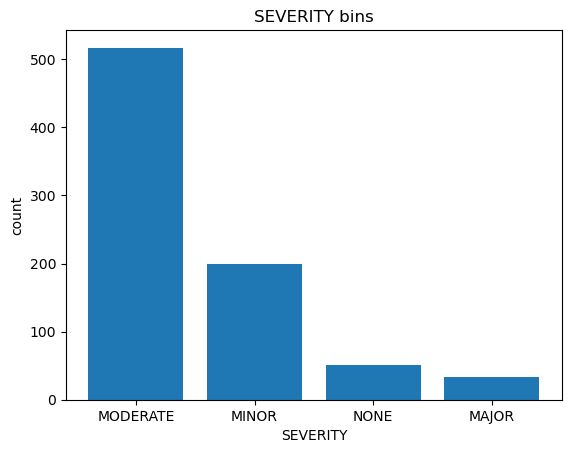

In [ ]:
%matplotlib inline
group_names=['MODERATE','MINOR','NONE','MAJOR' ]
plt.bar(group_names, D2D_severity_1["SEVERITY"].value_counts())

# set x/y labels and plot title
plt.xlabel("SEVERITY")
plt.ylabel("count")
plt.title("SEVERITY bins")

In [ ]:
SEVERITY_dummies=pd.get_dummies(D2D_severity_1['SEVERITY'])
SEVERITY_dummies

,MAJOR,MINOR,MODERATE,NONE
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
796,0,0,1,0
797,0,0,1,0
798,0,0,1,0
799,0,0,1,0


In [ ]:
SEVERITY_dummies.rename(columns={'MAJOR':'SEVERITY-MAJOR','MINOR':'SEVERITY-MINOR','MODERATE':'SEVERITY-MODERATE','NONE':'SEVERITY-NONE'},inplace=True)
SEVERITY_dummies.head()

,SEVERITY-MAJOR,SEVERITY-MINOR,SEVERITY-MODERATE,SEVERITY-NONE
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0


In [ ]:
D2D_severity_2=pd.concat([D2D_severity_1,SEVERITY_dummies],axis=1)

In [ ]:
D2D_severity_2.head()

,DRUG1,DRUG2,SEVERITY,DESCRIPTION,EXTENDED_DESCRIPTION,REFERENCES,SEVERITY-MAJOR,SEVERITY-MINOR,SEVERITY-MODERATE,SEVERITY-NONE
0,ACETAMINOPHEN (TYLENOL),PARACETAMOL,NONE,No Interactions Found,NaN,NaN,0,0,0,1
1,ACETAMINOPHEN (TYLENOL),ASPIRIN,NONE,No Interactions Found,NaN,NaN,0,0,0,1
2,ACETAMINOPHEN (TYLENOL),IBUPROFEN,NONE,No Interactions Found,NaN,NaN,0,0,0,1
3,ACETAMINOPHEN (TYLENOL),METFORMIN,NONE,No Interactions Found,NaN,NaN,0,0,0,1
4,ACETAMINOPHEN (TYLENOL),CIPROFLOXACIN,MAJOR,The metabolism of Acetaminophen can be decreas...,The concurrent administration of CYP1A2 inhibi...,"Kot M, Daniel WA: Caffeine as a marker substra...",1,0,0,0


In [ ]:
D2D_severity_2['SEVERITY-NONE']

0      1
1      1
2      1
3      1
4      0
      ..
796    0
797    0
798    0
799    0
800    0
Name: SEVERITY-NONE, Length: 801, dtype: uint8

In [ ]:
features=['DRUG1','DRUG2','SEVERITY-MAJOR','SEVERITY-MINOR','SEVERITY-MODERATE','SEVERITY-NONE','DESCRIPTION']

In [ ]:
D2D_severity_3=D2D_severity_2[features]

In [ ]:
D2D_severity_3.head()

,DRUG1,DRUG2,SEVERITY-MAJOR,SEVERITY-MINOR,SEVERITY-MODERATE,SEVERITY-NONE,DESCRIPTION
0,ACETAMINOPHEN (TYLENOL),PARACETAMOL,0,0,0,1,No Interactions Found
1,ACETAMINOPHEN (TYLENOL),ASPIRIN,0,0,0,1,No Interactions Found
2,ACETAMINOPHEN (TYLENOL),IBUPROFEN,0,0,0,1,No Interactions Found
3,ACETAMINOPHEN (TYLENOL),METFORMIN,0,0,0,1,No Interactions Found
4,ACETAMINOPHEN (TYLENOL),CIPROFLOXACIN,1,0,0,0,The metabolism of Acetaminophen can be decreas...


In [ ]:
D2D_severity_3.to_csv('data/D2D_severity_processed.csv',index=False)